# Utility Functions For ML

In [1]:
!pip install numpy --upgrade

In [2]:
import numpy as np

### clip
- Clip (limit) the values in an array.
- **Syntax**: `numpy.clip(a, a_min=<no value>, a_max=<no value>, out=None, *, min=<no value>, max=<no value>, **kwargs)`
- Equivalent to but faster than `np.minimum(a_max, np.maximum(a, a_min))`



If an interval of [0, 1] is specified, values smaller than 0 become 0, and values larger than 1 become 1

In [4]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
np.clip(a, 1, 8)

array([1, 1, 2, 3, 4, 5, 6, 7, 8, 8])

In [6]:
np.clip(a, 8, 1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

When `a_min` is greater than `a_max`, clip returns an array in which all values are equal to `a_max`, as shown in the second example.

In [9]:
np.clip(a, 3, 6, out=a)
a

array([3, 3, 3, 3, 4, 5, 6, 6, 6, 6])

In [10]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
np.clip(a, [3, 4, 1, 1, 1, 4, 4, 4, 4, 4], 8)

array([3, 4, 2, 3, 4, 5, 6, 7, 8, 8])

### unique
- Find unique values in an array
- **Syntax**: `numpy.unique(ar, return_index=False, return_inverse=False, return_counts=False, axis=None, *, equal_nan=True)`
  - ar - Input array.
  - return_index - If True, also return the indices of ar
  - return_inverse - If True, also return the indices of the unique array
  - return_counts - If True, also return the number of times each unique item appears in ar.
  - equal_nan - If True, collapses multiple NaN values in the return array into one.

In [12]:
np.unique([1, 1, 2, 2, 3, 3])

array([1, 2, 3])

In [13]:
a = np.array([[1,2],[3,4]])
np.unique(a)

array([1, 2, 3, 4])

In [16]:
a = np.array([[1, 0, 0], [1, 0, 0], [2, 3, 4]])
np.unique(a, axis=0)

array([[1, 0, 0],
       [2, 3, 4]])

In [17]:
a = np.array(['a', 'b', 'b', 'c', 'a'])
u, indices = np.unique(a, return_index=True)
u, indices

(array(['a', 'b', 'c'], dtype='<U1'), array([0, 1, 3]))

In [21]:
a = np.array([1,2,5,3,5,7,1,4])
u, indices = np.unique(a, return_inverse=True)
u, indices

(array([1, 2, 3, 4, 5, 7]), array([0, 1, 4, 2, 4, 5, 0, 3]))

In [22]:
a = np.array([1, 2, 6, 4, 2, 3, 2])
values, counts = np.unique(a, return_counts=True)
values, counts

(array([1, 2, 3, 4, 6]), array([1, 3, 1, 1, 1]))

In [23]:
np.repeat(values, counts) # original order not preserved

array([1, 2, 2, 2, 3, 4, 6])

### bincount
- Count occurrences of values
- **Syntax**: `numpy.bincount(x, /, weights=None, minlength=0)`
  - x - Input array.
  - weights - Weights, array of the same shape as x.
  - minlength - A minimum number of bins for the output array


In [24]:
np.bincount(np.arange(5))

array([1, 1, 1, 1, 1])

In [25]:
np.bincount(np.array([0, 1, 1, 3, 2, 1, 7]))

array([1, 3, 1, 1, 0, 0, 0, 1])

* `counts[0]` is 1 because '0' appears once in `arr`.
* `counts[1]` is 3 because '1' appears three times in `arr`.
* `counts[2]` is 1 because '2' appears once in `arr`.
* `counts[3]` is 1 because '3' appears once in `arr`.
* `counts[4]` is 0 because '4' is not present in `arr`.
* `counts[5]` is 0 because '5' is not present in `arr`.
* `counts[6]` is 0 because '6' is not present in `arr`.
* `counts[7]` is 1 because '7' appears once in `arr`

The input array should contain only non-negative integers.


In [26]:
w = np.array([0.3, 0.5, 0.2, 0.7, 1., -0.6]) # weights
x = np.array([0, 1, 1, 2, 2, 2])
np.bincount(x,  weights=w)

array([0.3, 0.7, 1.1])

Imagine you have a set of items, each belonging to a specific category (represented by the numbers in `x`). Each item also has a weight assigned to it (represented by the numbers in `w`). The `np.bincount` function with weights essentially calculates the total weight for each category by summing the weights of all items belonging to that category.

How it works with the given data:

* The x array has values `[0, 1, 1, 2, 2, 2]`. This means there are `3` categories: `0, 1, and 2`.
* The w array has corresponding weights `[0.3, 0.5, 0.2, 0.7, 1., -0.6]`.
`np.bincount` will:
* Calculate the total weight for category `0: 0.3` (weight of the first element in w corresponding to the first element `'0'` in `x`)
* Calculate the total weight for category` 1: 0.5 + 0.2` (weights of the second and third elements in w corresponding to` '1's` in `x`)
* Calculate the total weight for category `2: 0.7 + 1.0 + (-0.6)` (weights of the fourth, fifth, and sixth elements in w corresponding to `'2's` in `x`)


### meshgrid
- Generate coordinate grids (useful in visualization)
- Return a tuple of coordinate matrices from coordinate vectors.
- **Syntax**: `numpy.meshgrid(*xi, copy=True, sparse=False, indexing='xy')`
  - x1, x2,…, xn - 1-D arrays representing the coordinates of a grid
  - indexing - Cartesian ('xy', default) or matrix ('ij') indexing of output
  - sparse - If True the shape of the returned coordinate array for dimension i is reduced from `(N1, ..., Ni, ... Nn)` to `(1, ..., 1, Ni, 1, ..., 1)`.(to reduce the dimensionality of the returned coordinate array for memory conservation.)
  - copy - return a view into the original arrays or a copy.

In [29]:
nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)
xv, yv

(array([[0. , 0.5, 1. ],
        [0. , 0.5, 1. ]]),
 array([[0., 0., 0.],
        [1., 1., 1.]]))

1. x = np.linspace(0, 1, nx): Since nx is 3, this creates an array x with 3 evenly spaced values between 0 and 1: [0. , 0.5, 1. ].

2. y = np.linspace(0, 1, ny): Since ny is 2, this creates an array y with 2 evenly spaced values between 0 and 1: [0., 1.].

3. xv, yv = np.meshgrid(x, y): This is where the grid is created:
  - xv: np.meshgrid repeats the x array ([0. , 0.5, 1. ]) to form the rows of the xv array. Since there are ny (2) rows needed, it creates the following:
  ```python
  array([[0. , 0.5, 1. ],
        [0. , 0.5, 1. ]])
    ```
  - yv: np.meshgrid repeats the y array ([0., 1.]) to form the columns of the yv array. To fill the nx (3) columns, it generates:
  ```python
  array([[0., 0., 0.],
        [1., 1., 1.]])
    ```

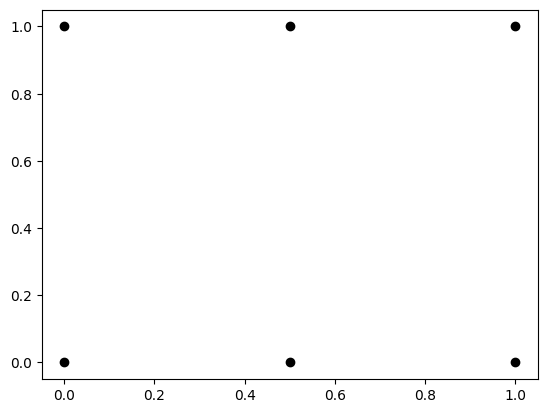

In [34]:
# We are just visualising out data with matplotlib. We are not discussing matplotlib, this just for better understanding of our topic - meshgrid
import matplotlib.pyplot as plt
plt.plot(xv, yv, marker='o', color='k', linestyle='none')
plt.show()

In [31]:
x = np.linspace(-5, 5, 101)
y = np.linspace(-5, 5, 101)
# full coordinate arrays
xx, yy = np.meshgrid(x, y)
zz = np.sqrt(xx**2 + yy**2)
xx.shape, yy.shape, zz.shape
# sparse coordinate arrays
xs, ys = np.meshgrid(x, y, sparse=True)
zs = np.sqrt(xs**2 + ys**2)
xs.shape, ys.shape, zs.shape
np.array_equal(zz, zs)

True

1. Creating the Input:
  - `np.linspace(-5, 5, 101)` generates a 1-dimensional NumPy array named `x` (and `y` similarly) containing 101 evenly spaced points between -5 and 5. These arrays will represent the coordinates along the `x` and `y` axes of our grid.
2. Generating Full Coordinate Arrays:
  - `np.meshgrid(x, y)` creates two 2-dimensional arrays, `xx` and `yy`.
    - `xx` contains the x-coordinates for each point on the grid. Each row of `xx` is a copy of the original `x` array.
    - `yy` contains the y-coordinates, with each column being a copy of the original `y` array.
  - `zz = np.sqrt(xx**2 + yy**2)` calculates the value of `z` (using the distance formula) for each `(x, y)` coordinate pair on the grid and stores it in the `zz` array. This creates a 2D grid of z values corresponding to the `(x, y)` coordinates.
  -` xx.shape, yy.shape, zz.shape` displays the dimensions (shape) of the `xx`, `yy`, and `zz` arrays, providing information about the size of the grid.

3. Generating Sparse Coordinate Arrays:
  - `np.meshgrid(x, y, sparse=True)` does the same as above but creates `xs` and `ys` as sparse arrays. This means they store only the unique values of `x` and `y`, which can save memory, especially for large grids.
  - `zs = np.sqrt(xs**2 + ys**2)` calculates the `z` values similarly to before, but using the sparse coordinate arrays.
  - `xs.shape, ys.shape, zs.shape` shows the dimensions of the sparse arrays. Notice that their dimensions are smaller than the full arrays.

4. Comparing Results:
  - `np.array_equal(zz, zs)` compares the values in the `zz` array (calculated from full coordinates) and the `zs` array (calculated from sparse coordinates). This checks if the two methods produce the same results, verifying that the sparse representation is functionally equivalent to the full representation.



> Explanation by gemini



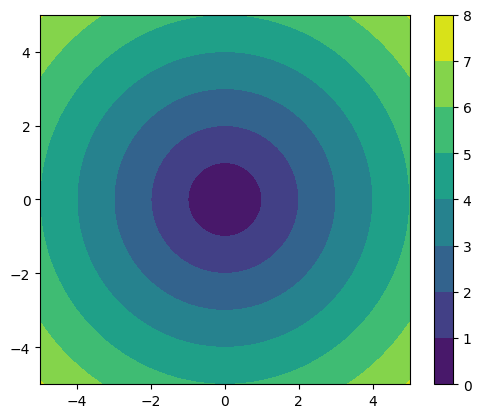

In [32]:
h = plt.contourf(x, y, zs)
plt.axis('scaled')
plt.colorbar()
plt.show()

### References
- [np.clip()](https://numpy.org/doc/stable/reference/generated/numpy.clip.html)
- [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)
- [np.bincount()](https://numpy.org/doc/stable/reference/generated/numpy.bincount.html)
- [np.meshgrid()](https://numpy.org/doc/2.2/reference/generated/numpy.meshgrid.html)